# LGMVIP TASK 1- IRIS FLOWERS CLASSIFICATION ML PROJECT

**Importing the Modules and loading Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.datasets import load_iris

In [3]:
df=pd.read_csv("Iris[1].csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#delete column
df=df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**Preprocessing the dataset**

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Exploratory Data Analysis**

<AxesSubplot:>

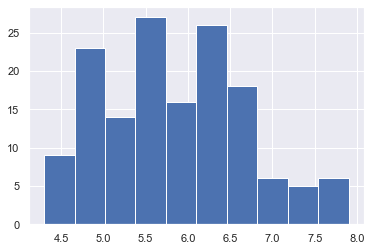

In [9]:
df["SepalLengthCm"].hist()

<AxesSubplot:>

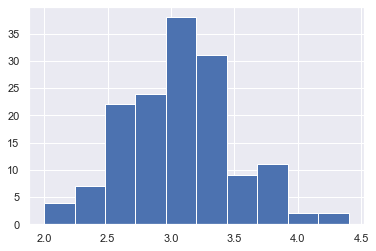

In [10]:
df["SepalWidthCm"].hist()

<AxesSubplot:>

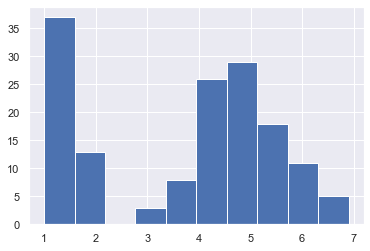

In [11]:
df["PetalLengthCm"].hist()

<AxesSubplot:>

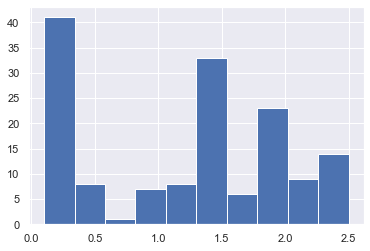

In [12]:
df["PetalWidthCm"].hist()

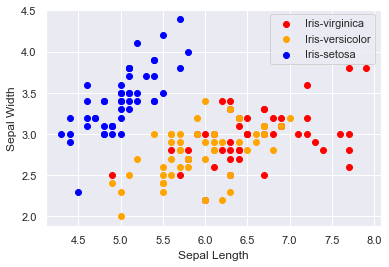

In [13]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

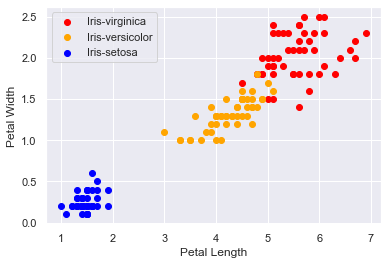

In [14]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

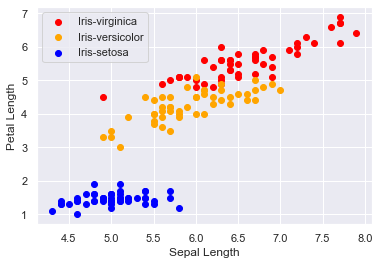

In [15]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalLengthCm"],x["PetalLengthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

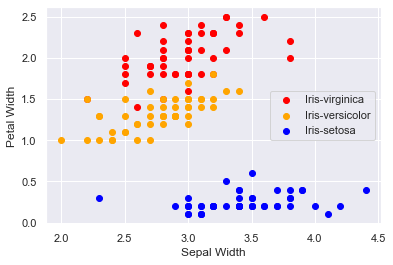

In [16]:
for i in range(3):
    x=df[df["Species"]==species[i]]
    plt.scatter(x["SepalWidthCm"],x["PetalWidthCm"],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

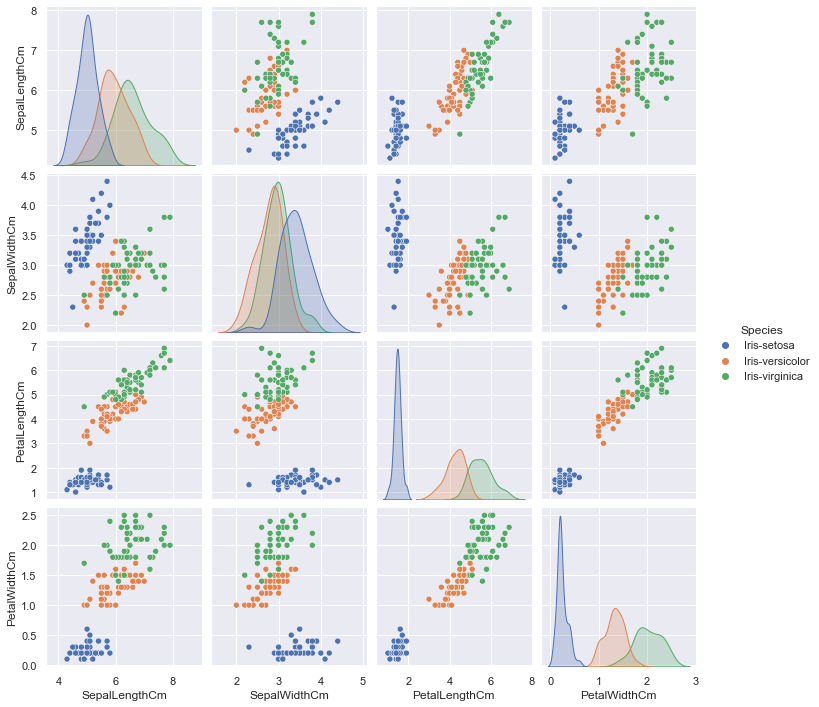

In [17]:
#visualize the whole dataset
sns.pairplot(df, hue="Species")

<AxesSubplot:>

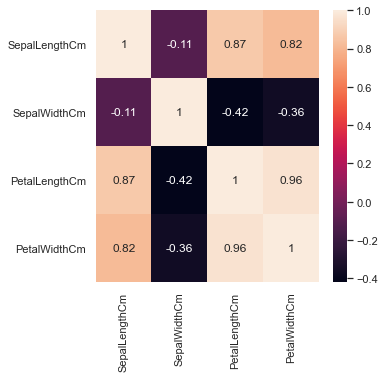

In [18]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True,ax=ax)

**Model Training**

In [21]:
from sklearn.model_selection import train_test_split
#train- 70
#test- 30

X=df.drop(columns=["Species"])
Y=df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.20)

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
#print metric to get performance
print("Accuracy: ",model.score(X_test,y_test))

Accuracy:  1.0


In [24]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Accuracy: ",model.score(X_test,y_test))

Accuracy:  0.9333333333333333


In [31]:
#save the model
import pickle
filename="saveddmodel.pkl"
pickle.dump(model, open(filename, "wb"))

In [32]:
load_model=pickle.load(open(filename,"rb"))

In [36]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)